# Decision Trees

## What are Decision Trees?

- A type of supervised learning algorithm used for classification and regression tasks.
- Works by splitting the dataset into branches based on feature values, eventually reaching a decision (output).

## Anatomy of a Decision Tree 
Basic Components:

- Root Node: The top node representing the entire dataset.
- Internal Nodes: Decision points based on feature values.
- Branches: Outcomes of decisions leading to further splits or leaves.
- Leaf Nodes: Final decision or prediction.
- Stump: Root node with the first split.

Example: Survival on the Titanic

| Class  | Gender | Survived |
|---------|-----|---------------|
| 1st    | female  | Yes           |
| 2nd  | male  | No            |
| 3rd     | male  | No            |
| 2nd  | female  | Yes           |



Is Income High?
Yes → Buys Product: Yes
No → Next question...
Is Age < 30?
Yes → Buys Product: No
No → Buys Product: Yes

## Tree Growing Process:

- Start at the root.
- Split based on the feature that maximizes information gain (or minimizes impurity/MSE).
- Continue until:
    -  No further splits improve the model.
    - A stopping criterion is met (e.g., max depth or min samples per leaf).

## Let's explore the iris data set:


The iris data set is often used for classification. The task is to c classify flowers into one of three species based on their physical features.

### Number of Samples:

- 150 samples in total.
- 50 samples per species.

### Features:
- Sepal length (in cm)
- Sepal width (in cm)
- Petal length (in cm)
- Petal width (in cm)


### The target labels are three species of Iris flowers:
- Setosa
- Versicolor
- Virginica

| Sepal Length | Sepal Width | Petal Length | Petal Width | Species     |
|--------------|-------------|--------------|-------------|-------------|
| 5.1          | 3.5         | 1.4          | 0.2         | Setosa      |
| 7.0          | 3.2         | 4.7          | 1.4         | Versicolor  |
| 6.3          | 3.3         | 6.0          | 2.5         | Virginica   |



In [43]:
from sklearn.datasets import load_iris

iris = load_iris()

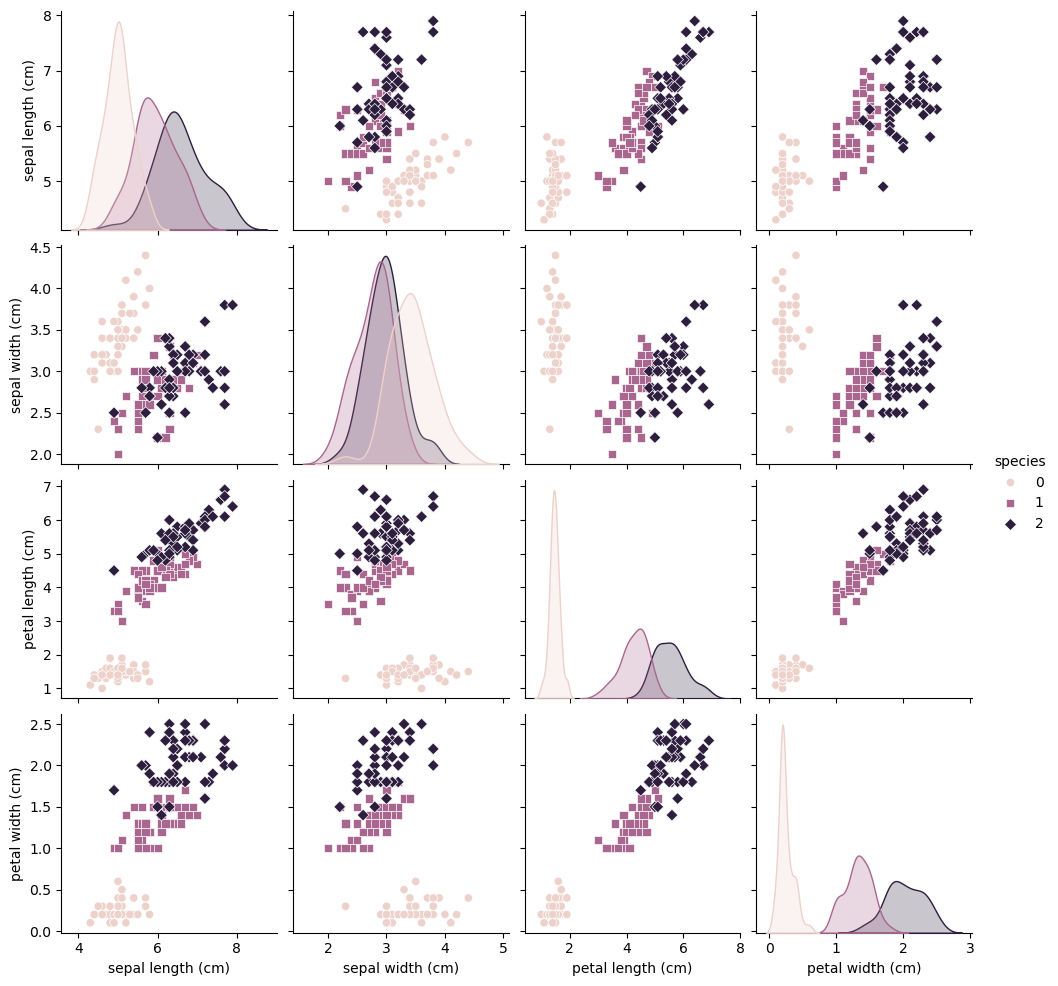

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target

# Plot pairplot
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()



### Using decision trees for Regression

Goal:

- Predict a continuous target variable by splitting the data into regions where the target values are similar.

Splitting the Data:

- The tree starts at the root node and evaluates all possible splits for each feature.
- It selects the split that minimizes the variance (or another error metric like Mean Squared Error, MSE) of the target variable in the resulting groups.

Recursive Partitioning:

- The tree keeps splitting the data recursively, creating branches, until it meets a stopping condition:
    - Maximum tree depth.
    - Minimum number of samples in a leaf node.
    - Minimum reduction in variance from a split.



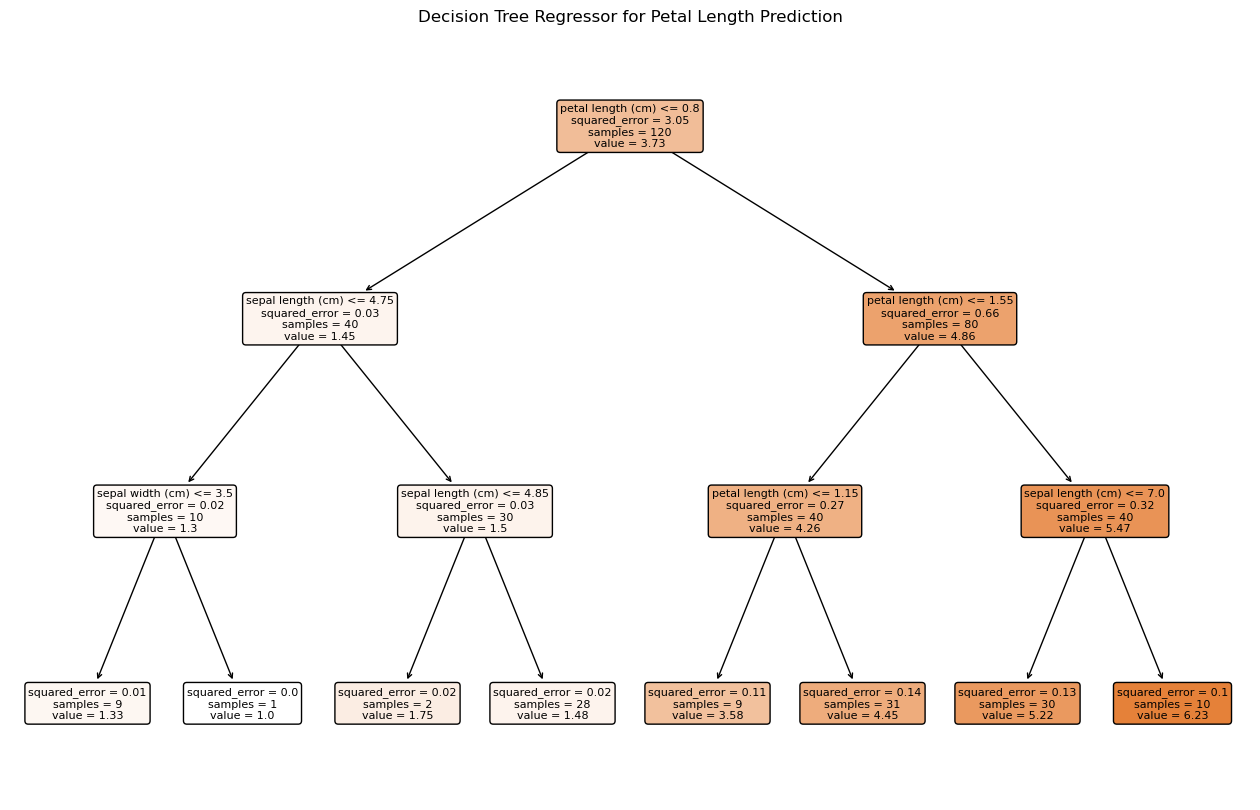

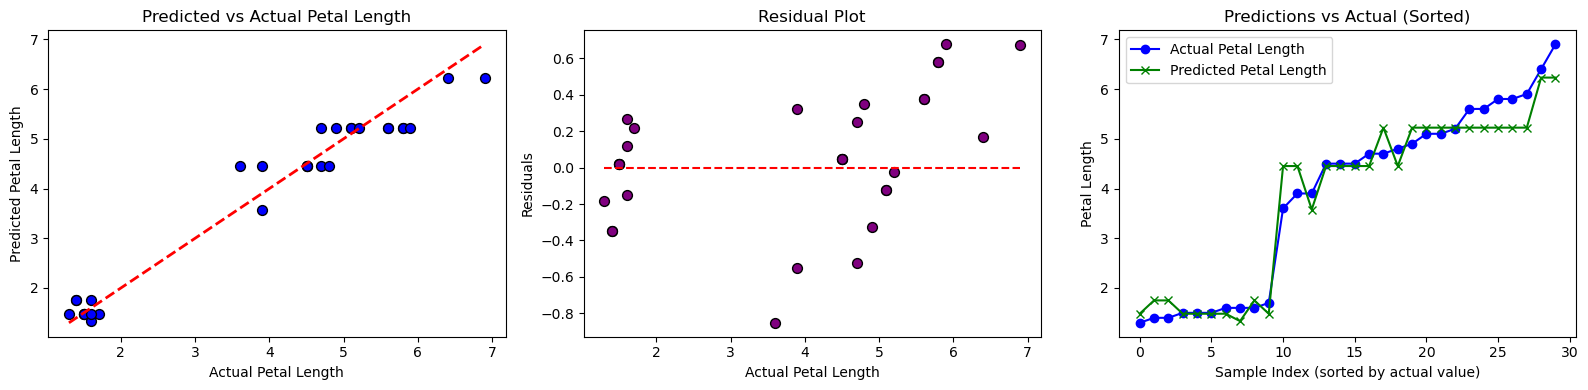

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

# Load the Iris dataset and set up for regression on petal length
iris = load_iris()
X = np.delete(iris.data, 2, axis=1)  # Use all features except petal length
y = iris.data[:, 2]  # Target is petal length

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(X_train, y_train)

# Predictions
y_pred = regressor.predict(X_test)

plt.figure(figsize=(16, 10))
plot_tree(
    regressor,
    feature_names=iris.feature_names[:3],  # Use the first 3 feature names since petal length is excluded
    filled=True,
    rounded=True,
    precision=2
)
plt.title("Decision Tree Regressor for Petal Length Prediction")
plt.show()


# 1. Scatter Plot: Predicted vs Actual Values
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, edgecolor="k", color="blue", s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--r", lw=2)  # Reference line
plt.xlabel("Actual Petal Length")
plt.ylabel("Predicted Petal Length")
plt.title("Predicted vs Actual Petal Length")

# 2. Residual Plot
residuals = y_test - y_pred
plt.subplot(1, 3, 2)
plt.scatter(y_test, residuals, edgecolor="k", color="purple", s=50)
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), linestyles="--", colors="red")
plt.xlabel("Actual Petal Length")
plt.ylabel("Residuals")
plt.title("Residual Plot")

# 3. Line Plot of Predictions vs Actual (sorted by petal length)
plt.subplot(1, 3, 3)
sorted_indices = np.argsort(y_test)  # Sort the test indices by actual values for better visual comparison
plt.plot(y_test[sorted_indices], label="Actual Petal Length", marker="o", color="blue")
plt.plot(y_pred[sorted_indices], label="Predicted Petal Length", marker="x", color="green")
plt.xlabel("Sample Index (sorted by actual value)")
plt.ylabel("Petal Length")
plt.legend()
plt.title("Predictions vs Actual (Sorted)")

plt.tight_layout()
plt.show()


### Using decision trees for Classification

Goal:

- Classify data points into predefined categories by recursively splitting the feature space.

Splitting Criteria:

- At each node, the algorithm selects a feature and split point that best separates the data into homogeneous groups.
- Common metrics to evaluate splits:
    - Gini Impurity: Measures how often a randomly chosen element from the set would be incorrectly labeled.
    - Entropy (Information Gain): Measures the reduction in uncertainty about the class after the split.

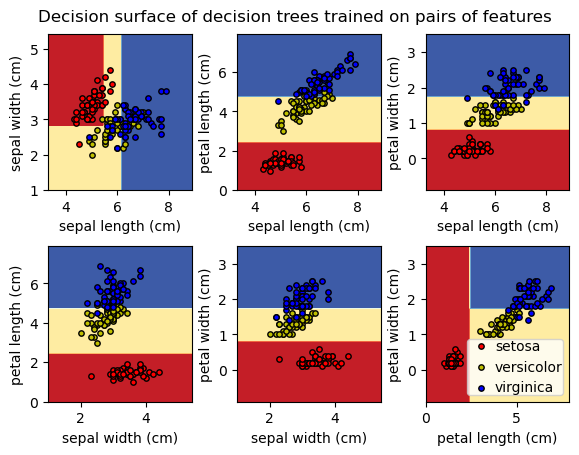

In [54]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier(max_depth=2).fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

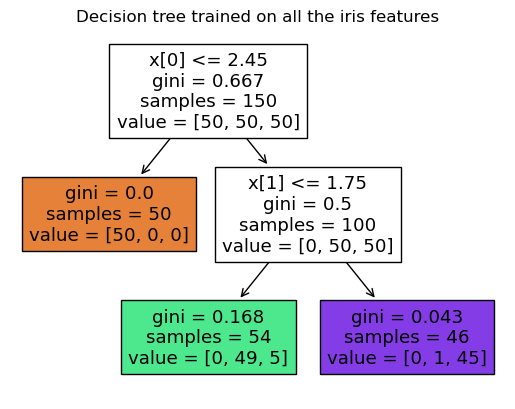

In [45]:
from sklearn.tree import plot_tree

plt.figure()
#clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

Let's go ove this tree:

x[1] <= cut-off: shows the cut-off that the decision was made of
Gini impurity: $G =  1 - \sum_{i=1}^{p} p_i^2$

which is a measure of split purity (probability of all items in the split to be in one class)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


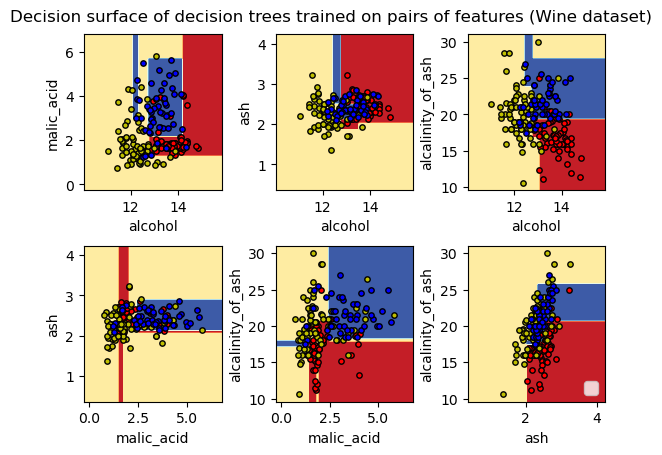

In [46]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_wine
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Load the Wine dataset
wine = load_wine()

# Parameters
n_classes = len(np.unique(wine.target))  # There are 3 classes in the wine dataset
plot_colors = "ryb"
plot_step = 0.02

# Plot decision boundaries for each pair of features
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # Select only the two features to visualize
    X = wine.data[:, pair]
    y = wine.target

    # Train the decision tree classifier
    clf = DecisionTreeClassifier(max_depth=4, random_state=42).fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=wine.feature_names[pair[0]],
        ylabel=wine.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=wine.target_names[i] if pairidx == 0 else None,  # Only label once
            edgecolor="black",
            s=15,
        )

# Add title and legend
plt.suptitle("Decision surface of decision trees trained on pairs of features (Wine dataset)")
plt.legend(loc="lower right", borderpad=0.5, handletextpad=0.5)
plt.show()


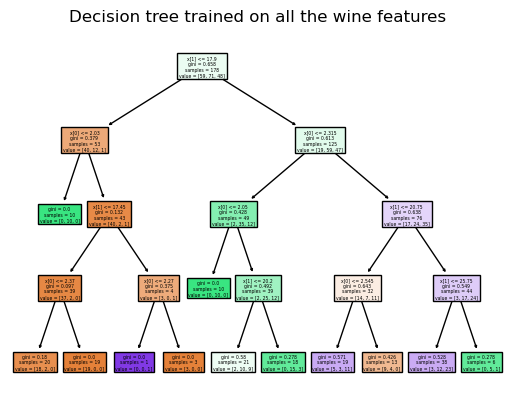

In [47]:
from sklearn.tree import plot_tree

plt.figure()
#clf = DecisionTreeClassifier(max_depth=3).fit(wine.data, wine.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the wine features")
plt.show()

XGBOOST

Key Concepts of XGBoost in Relation to Decision Trees
1. Ensemble Learning with Decision Trees:

XGBoost uses an ensemble of decision trees to make predictions. Instead of relying on a single tree, it trains multiple trees in a sequential manner, where each new tree attempts to correct the errors made by previous trees.
This technique, called boosting, creates a strong learner by combining the outputs of many weaker learners (individual trees).

2. Gradient Boosting:

XGBoost is a specific implementation of gradient boosting, which uses gradient descent to minimize the loss function.
At each step, XGBoost calculates the residuals (differences between actual and predicted values) and fits a new tree to these residuals. The goal is to iteratively reduce errors by learning from mistakes made in previous steps.
The gradients (slopes) of these residuals guide the algorithm on how to improve, hence the name "gradient boosting."

3. Tree Structure:

While traditional decision trees can be deep and overfit to training data, XGBoost uses shallow trees (often known as "stumps" if they’re very shallow). These shallow trees each focus on correcting specific aspects of the error rather than fitting the data comprehensively.
Each tree contributes only a small amount to the final prediction, and this controlled addition of "weak" learners (shallow trees) gradually improves accuracy.

4. Regularization:

XGBoost includes regularization to avoid overfitting, a common problem in decision trees. This regularization limits the growth of trees by penalizing overly complex models and controls the impact of each tree in the ensemble.
The main parameters for regularization include:
max_depth: Limits how deep each tree can grow.
learning_rate: Controls how much each tree contributes to the final prediction.
gamma: Adds a penalty for adding new splits in a tree, encouraging simpler models.
This regularization allows XGBoost to handle large, complex datasets more robustly than traditional decision trees.

5. Scalability and Speed:

XGBoost is optimized for speed and can handle large datasets efficiently through:
Parallel processing: XGBoost builds trees in parallel, improving training speed.
Pruning: It prunes unnecessary branches from the trees during training.
Handling missing values: XGBoost can handle missing data natively, improving performance on real-world datasets.

6. Handling Classification and Regression:

XGBoost can be used for both classification and regression problems. The main difference lies in the loss function used:
Logarithmic loss for classification tasks (e.g., binary classification).
Mean squared error for regression tasks

In [61]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Train the classifier
xgb_clf.fit(X_train, y_train)

# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


Accelerate xgboost by enableing GPU usage

In [68]:
# Set parameters for GPU training with histogram-based split finding
params = {
    'device': 'cuda',           # Use GPU
    'tree_method': 'hist',      # Histogram-based method for split finding
    'objective': 'multi:softmax',  # Multi-class classification objective
    'num_class': 3              # Number of classes
}

# Create QuantileDMatrix from feature matrix X and target y
Xy = xgb.QuantileDMatrix(X, y)

# Train the model using the QuantileDMatrix
model = xgb.train(params, Xy)


/Users/johannabayer/anaconda3/envs/ML_env/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [18:39:32] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


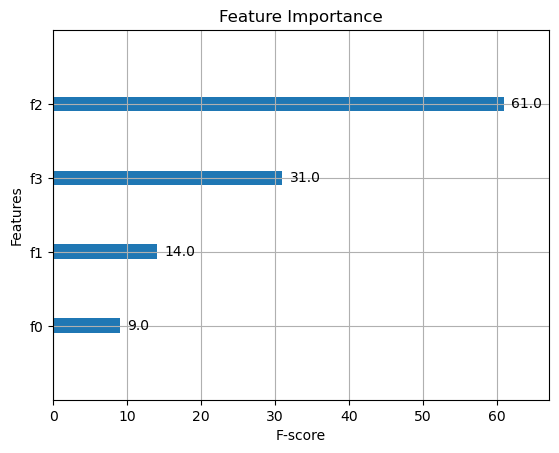

In [69]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset and split into train and test sets
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set parameters and train the model
params = {
    'objective': 'multi:softmax',  # Multi-class classification objective
    'num_class': 3,                # Number of classes
    'tree_method': 'hist'          # Use histogram-based method for efficiency
}
dtrain = xgb.DMatrix(X_train, label=y_train)
model = xgb.train(params, dtrain, num_boost_round=10)

# Plot feature importance
xgb.plot_importance(model)
plt.title("Feature Importance")
plt.xlabel("F-score")
plt.ylabel("Features")
plt.show()


In [42]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  